In [1]:
import numpy as np
import numba as nb
from numba.typed import List
import pandas as pd
import itertools
from operator import itemgetter
import gc

from scipy.stats import norm, lognorm, truncnorm
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter, deque
from sys import getsizeof
from sedgen.initialization import SedGen
from sedgen import initialization as ini
from sedgen import general as gen
from sedgen import preprocessing
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load jupyter extension to reload packages before executing user code.
# https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%load_ext autoreload
# Reload all packages (except those excluded by %aimport) every time 
# before executing the Python code typed.
%autoreload 2



In [2]:
def optimise_learnrate(minerals, par_rock_volume, modal_mineralogy, means, stds):
    learnrate = 500
    counter = 0
    while counter != 10:
        model = SedGen(minerals, par_rock_volume, modal_mineralogy, means, stds, learning_rate = learnrate, discretization_init=False, timed = True)
        modelled_volume = np.sum(model.simulated_volume)
        print(par_rock_volume)
        print(modelled_volume)
        if modelled_volume < ((par_rock_volume*0.0001)+par_rock_volume) and modelled_volume> (par_rock_volume-(par_rock_volume*0.0001)): 
            break
        else:
            learnrate *= 2
        print(counter, learnrate)
        counter += 1
    pluton_learnrate = learnrate * par_rock_volume
    return (pluton_learnrate)
    
            

In [3]:
minerals = ["Q", "P", "K", "B", "O", "A"]

In [4]:
modal_mineralogy = np.array([[0.16331256, 0.46387757, 0.12683457, 0.05758711, 0.01078412, 0.17760407],   # AZ
                             [0.27453254, 0.40124204, 0.24993859, 0.02509231, 0.00454988, 0.04464465],   # CA-EW
                             [0.30591989, 0.38159713, 0.26209888, 0.0188256 , 0.00799247, 0.02356603],   # CA-NS
                             [0.19781274, 0.41766034, 0.16121575, 0.06478527, 0.00894429, 0.14958161],   # GR
                             [0.25983144, 0.46392506, 0.15827298, 0.04370113, 0.00689158, 0.06737782],   # MT
                             [0.22419158, 0.48490082, 0.05641885, 0.11571367, 0.00000001, 0.11877509]])
print(modal_mineralogy[0])

[0.16331256 0.46387757 0.12683457 0.05758711 0.01078412 0.17760407]


In [9]:
csds_AZ_means = np.array([0.120, 0.174, 0.112, 0.155, 0.066, 0.079])
csds_AZ_stds = np.array([0.359, 0.356, 0.455, 0.399, 0.328, 0.452])

csds_CA_EW_means = np.array([0.247, 0.333, 0.292, 0.212, 0.090, 0.127])
csds_CA_EW_stds = np.array([0.986, 0.640, 0.497, 0.889, 0.275, 0.502])

csds_CA_NS_means = np.array([0.309, 0.330, 0.244, 0.223, 0.120, 0.122])
csds_CA_NS_stds = np.array([0.823, 0.683, 0.817, 0.819, 0.554, 0.782])

csds_GR_means = np.array([0.244, 0.269, 0.222, 0.251, 0.059, 0.107])
csds_GR_stds = np.array([0.312, 0.450, 0.444, 0.262, 0.378, 0.313])

csds_MT_means = np.array([0.220, 0.227, 0.160, 0.153, 0.078, 0.075])
csds_MT_stds = np.array([0.472, 0.415, 0.344, 0.363, 0.315, 0.599])

csds_WA_means = np.array([0.342, 0.385, 0.241, 0.481, 0.001, 0.130])
csds_WA_stds = np.array([0.542, 0.478, 0.386, 0.467, 0.001, 0.494])


weightedmeanAZ = np.sum(modal_mineralogy[0]*csds_AZ_means)
weightedmeanCA_EW = np.sum(modal_mineralogy[1]*csds_CA_EW_means)
weightedmeanCA_NS = np.sum(modal_mineralogy[2]*csds_CA_NS_means)
weightedmeanGR = np.sum(modal_mineralogy[3]*csds_GR_means)
weightedmeanMT = np.sum(modal_mineralogy[4]*csds_MT_means)
weightedmeanWA = np.sum(modal_mineralogy[5]*csds_WA_means)

print(weightedmeanAZ,weightedmeanCA_EW,weightedmeanCA_NS,weightedmeanGR,weightedmeanMT,weightedmeanWA)

0.13818615172 0.28580413444999997 0.29244068649000005 0.22920088467000002 0.20007473485000002 0.3480563158900001


In [6]:
learnvalueAZ = optimise_learnrate(minerals, 1e9, modal_mineralogy[0], csds_AZ_means, csds_AZ_stds)
learnvalueCA_EW = optimise_learnrate(minerals, 1e9, modal_mineralogy[1], csds_CA_EW_means, csds_CA_EW_stds)
learnvalueCA_NS = optimise_learnrate(minerals, 1e9, modal_mineralogy[2], csds_CA_NS_means, csds_CA_EW_stds)
learnvalueGR = optimise_learnrate(minerals, 1e9, modal_mineralogy[3], csds_GR_means, csds_GR_stds)
learnvalueMT = optimise_learnrate(minerals, 1e9, modal_mineralogy[4], csds_MT_means, csds_MT_stds)
learnvalueWA = optimise_learnrate(minerals, 1e9, modal_mineralogy[5], csds_WA_means, csds_WA_stds)
xaxis = np.array([learnvalueAZ, learnvalueCA_EW, learnvalueCA_NS, learnvalueGR, learnvalueMT, learnvalueWA])

---SedGen model initialization started---

Initializing modal mineralogy...
Initializing csds...
Initializing bins...
Simulating mineral occurences... |Q|P|K|B|O|A| Done in 35.3547 seconds
Initializing interfaces... |Q|P|K|B|O|A| Done in 82.8769 seconds
Counting interfaces...  Done in 0.8567 seconds
Correcting interface arrays for consistency...
too much Q 7
too few P -3
too few K -1
too much B 1
all good O 0
too few A -4
Initializing crystal size array... |Q|P|K|B|O|A| Done in 5.5969 seconds
Initializing inter-crystal breakage probability arrays...
Initializing model evolution arrays...

---SedGen model initialization finished succesfully---
1000000000.0
1000002670.5201346
---SedGen model initialization started---

Initializing modal mineralogy...
Initializing csds...
Initializing bins...
Simulating mineral occurences... |Q|P|K|B|O|A| Done in 4.1789 seconds
Initializing interfaces... |Q|P|K|B|O|A| Done in 8.9149 seconds
Counting interfaces...  Done in 0.0951 seconds
Correcting interfa

[5.e+11 8.e+12 8.e+12 5.e+11 5.e+11 1.e+12] [0.13818615 0.28580413 0.29244069 0.22920088 0.20007473 0.34805632]


Text(0, 0.5, 'weighted grain size')

Text(0.5, 0, 'learnvalue for plutons')

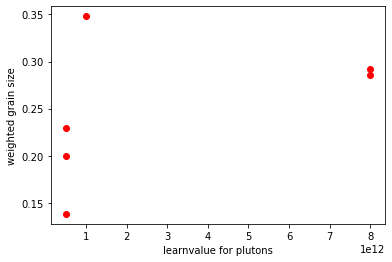

In [10]:
yaxis = np.array([weightedmeanAZ,weightedmeanCA_EW,weightedmeanCA_NS,weightedmeanGR,weightedmeanMT,weightedmeanWA])
plt.plot(xaxis, yaxis, 'ro')
print(xaxis,yaxis)
plt.ylabel('weighted grain size')
plt.xlabel('learnvalue for plutons')